# Walmart Project

**Walmart is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States and 23 other countries**

## - **We have the weekly sales data for their various outlets. We will use statistical analysis and EDA to derive insights from the data**
- **In our analysis we will derive some of the following insights:**
- **A -  If the weekly sales are affected by the unemployment rate, if yes, which stores are suffering the most**
- **B - If the weekly sales show a seasonal trend, when and what could be the reason?**
- **C - Does temperature affect the weekly sales in any manner?**
- **D - How is the consumer price index affecting the sales of various stores?**
- **E - Top performing stores according to historical data**
- **F - The worst performing stores and how significant is the difference between the highest and the lowest performing stores?**g:

## Importing preliminary libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [12]:
df = pd.read_csv("Walmart DataSet.csv")

In [14]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Attribute Information

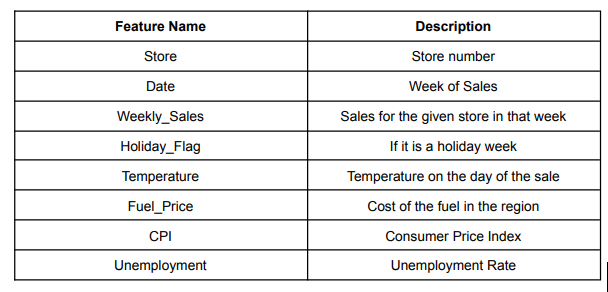

## General Observation

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
for column in df:
    print(f"{column} - ({len(df[column].unique())}) : {df[column].unique()} \n")

Store - (45) : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 

Date - (143) : ['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011'
 '01-04-2011' '08-04-2011' '15-04-2011

**Renaming the columns: Converting all column names into small letters for convenience**

In [24]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [26]:
df.rename(columns = {"Store" : "store",
                    "Date" : "date",
                    "Weekly_Sales" : "weekly_sales",
                    "Holiday_Flag" : "holiday_flag",
                    "Temperature" : "temperature",
                    "Fuel_Price" : "fuel_price",
                    "CPI" : "cpi",
                    "Unemployment" : "unemployment"}, inplace=True)

## Exploarotry Data Analysis

**Converting date from object dtype to date time format**

In [29]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

**Number of records for each store**

In [33]:
df["store"].value_counts().unique()

array([143], dtype=int64)

### Statistical Summary

In [36]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
weekly_sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
holiday_flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
fuel_price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
cpi,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


#### Analysis of statistical summary

**weekly_Sales**

- Mean sales 1.046M
- Standard deviation is 564K
- Median is 960K
- Median<mean, hence the data is slightly skewed towards the right
- Min sales is 209.9K and Max sales is 3.81M
- The range from min to first quartile is smaller compared to the range from third quartile to max
- The minimum value is within 2 standard deviations from the mean
- While the maximum value is outside of 3 standard deviations from the mean
- This means there are outliers present outside upper bound

**holiday_flag**

- It's a boolean column
- 0 - no holiday in a given week
- 1 - there is a holiday in a given week
- Clearly, most of the values will be 0 as there are very few holidays compared to working days

**fuel_price**

- Mean price is 3.35
- Standard deviation is 0.45
- Min price is 2.47 and max price is 4.46
- Min price is within 2 standard deviations and Max price is within 3 standard deviations from the mean
- Mean is slightly less than the median, hence data is slightly skewed towards the left

**cpi**

- Mean cpi is 171.5
- Standard deviation is 39.35
- Min cpi is 126 and max cpi is 227
- Both Min and Max cpi are within 2 standard deviations from the mean

**unemployment**

- Mean unemployment rate is 7.99~8
- Standard deviation is 1.875
- Min rate is 3.879 and max rate is 14.313
- The Min rate is within 3 standard deviations while max rate is beyond 3 standard deviations from the mean
- Hence, some outliers present outside the upper bound

- **The above statistical summary is for the entire dataset containing all the stores**
- **We would also like to analyze the store wise data and derive insights for each store**

### Store wise statistical summary

In [123]:
store_stats = df.groupby("store").agg({
    'weekly_sales': ['mean', 'std', 'min', 'max', 'sum']
}).round(2)
store_stats

weekly_sales                                                 
              mean        std         min         max           sum
store                                                              
1       1555264.40  155980.77  1316899.31  2387950.20  2.224028e+08
2       1925751.34  237683.69  1650394.44  3436007.68  2.753824e+08
3        402704.44   46319.63   339597.38   605990.41  5.758674e+07
4       2094712.96  266201.44  1762539.30  3676388.98  2.995440e+08
5        318011.81   37737.97   260636.71   507900.07  4.547569e+07
6       1564728.19  212525.86  1261253.18  2727575.18  2.237561e+08
7        570617.31  112585.47   372673.61  1059715.27  8.159828e+07
8        908749.52  106280.83   772539.12  1511641.09  1.299512e+08
9        543980.55   69028.67   452905.22   905324.68  7.778922e+07
10      1899424.57  302262.06  1627707.31  3749057.69  2.716177e+08
11      1356383.12  165833.89  1100418.69  2306265.36  1.939628e+08
12      1009001.61  139166.87   802105.50  1768249.89  1.442872e+08
13      2003620.31  265507.00  1633663.12  3595903.20  2.865177e+08
14      2020978.40  317569.95  1479514.66  3818686.45  2.889999e+08
15       623312.47  120538.65   454183.42  1368318.17  8.913368e+07
16       519247.73   85769.68   368600.00  1004730.69  7.425243e+07
17       893581.39  112162.94   635862.55  1309226.79  1.277821e+08
18      1084718.42  176641.51   540922.94  2027507.15  1.551147e+08
19      1444999.04  191722.64  1181204.53  2678206.42  2.066349e+08
20      2107676.87  275900.56  1761016.51  3766687.43  3.013978e+08
21       756069.08  128752.81   596218.24  1587257.78  1.081179e+08
22      1028501.04  161251.35   774262.28  1962445.04  1.470756e+08
23      1389864.46  249788.04  1016756.10  2734277.10  1.987506e+08
24      1356755.39  167745.68  1057290.41  2386015.75  1.940160e+08
25       706721.53  112976.79   558794.63  1295391.19  1.010612e+08
26      1002911.84  110431.29   809833.21  1573982.47  1.434164e+08
27      1775216.20  239930.14  1263534.86  3078162.08  2.538559e+08
28      1323522.24  181758.97  1079669.11  2026026.39  1.892637e+08
29       539451.43   99120.14   395987.24  1130926.79  7.714155e+07
30       438579.62   22809.67   369722.32   519354.88  6.271689e+07
31      1395901.44  125855.94  1198071.60  2068942.97  1.996139e+08
32      1166568.15  138017.25   955463.84  1959526.96  1.668192e+08
33       259861.69   24132.93   209986.25   331173.51  3.716022e+07
34       966781.56  104630.16   836717.75  1620748.25  1.382498e+08
35       919724.98  211243.46   576332.05  1781866.98  1.315207e+08
36       373511.99   60725.17   270677.98   489372.02  5.341221e+07
37       518900.28   21837.46   451327.61   605791.46  7.420274e+07
38       385731.65   42768.17   303908.81   499267.66  5.515963e+07
39      1450668.13  217466.45  1158698.44  2554482.84  2.074455e+08
40       964128.04  119002.11   764014.75  1648829.18  1.378703e+08
41      1268125.42  187907.16   991941.73  2263722.68  1.813419e+08
42       556403.86   50262.93   428953.60   674919.45  7.956575e+07
43       633324.72   40598.41   505405.85   725043.04  9.056544e+07
44       302748.87   24762.83   241937.11   376233.89  4.329309e+07
45       785981.41  130168.53   617207.58  1682862.03  1.123953e+08

In [125]:
store_stats.columns = ["_".join(col).strip() for col in store_stats.columns]
store_stats = store_stats.reset_index()

max_date = []
for i in range(1,46):
    data = df[df["store"]==i]
    index = data["weekly_sales"].idxmax()
    date = data["date"][index]
    max_date.append(date)

min_date = []
for i in range(1,46):
    data = df[df["store"]==i]
    index = data["weekly_sales"].idxmin()
    date = data["date"][index]
    min_date.append(date)

store_stats["max_date"] = max_date
store_stats["min_date"] = min_date
store_stats["store_date_max"] = store_stats["store"].astype(str) + "_" + store_stats["max_date"].astype(str)
store_stats["store_date_min"] = store_stats["store"].astype(str) + "_" + store_stats["min_date"].astype(str)

store_stats.head()

,store,weekly_sales_mean,weekly_sales_std,weekly_sales_min,weekly_sales_max,weekly_sales_sum,max_date,min_date,store_date_max,store_date_min
0,1,1555264.40,155980.77,1316899.31,2387950.20,2.224028e+08,2010-12-24,2011-01-28,1_2010-12-24,1_2011-01-28
1,2,1925751.34,237683.69,1650394.44,3436007.68,2.753824e+08,2010-12-24,2011-09-30,2_2010-12-24,2_2011-09-30
2,3,402704.44,46319.63,339597.38,605990.41,5.758674e+07,2010-12-24,2010-08-13,3_2010-12-24,3_2010-08-13
3,4,2094712.96,266201.44,1762539.30,3676388.98,2.995440e+08,2011-12-23,2010-03-26,4_2011-12-23,4_2010-03-26
4,5,318011.81,37737.97,260636.71,507900.07,4.547569e+07,2011-11-25,2011-01-14,5_2011-11-25,5_2011-01-14


#### Highest weekly sales recorded by each store

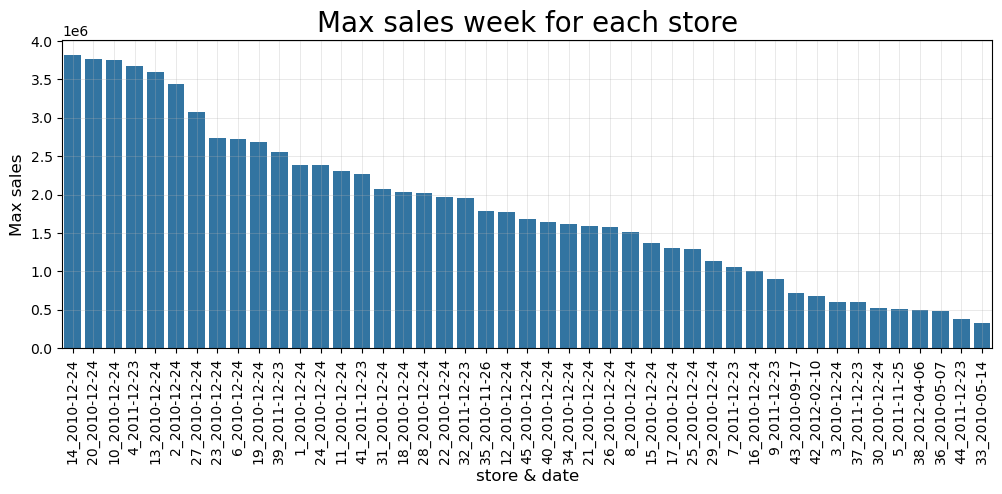

In [174]:
plt.figure(figsize=(12,4))
sns.barplot(x="store_date_max", y="weekly_sales_max", data=store_stats.sort_values("weekly_sales_max", ascending=False))
plt.xlabel("store & date", fontsize=12)
plt.ylabel("Max sales", fontsize=12)
plt.title("Max sales week for each store", fontsize=20)
plt.grid(alpha=0.5, linewidth=0.4)
plt.xticks(rotation=90)
plt.show()

- **Most of the stores record their highest sales in the month of December and the weel 12_24 or 12_23**
- **Stores 14, 20, 10 & 4 have recorded more than 3.5 million in sales in the week of 12_23 or 12_24 in the year 2010 while stores 13 & 2 have also wrecked in more than 3 Million in the same weeks of the same year**
- **Stores 33, 44, 36 & 38 haven't crossed half million in any week**

#### Lowest weekly sales recorded by each store

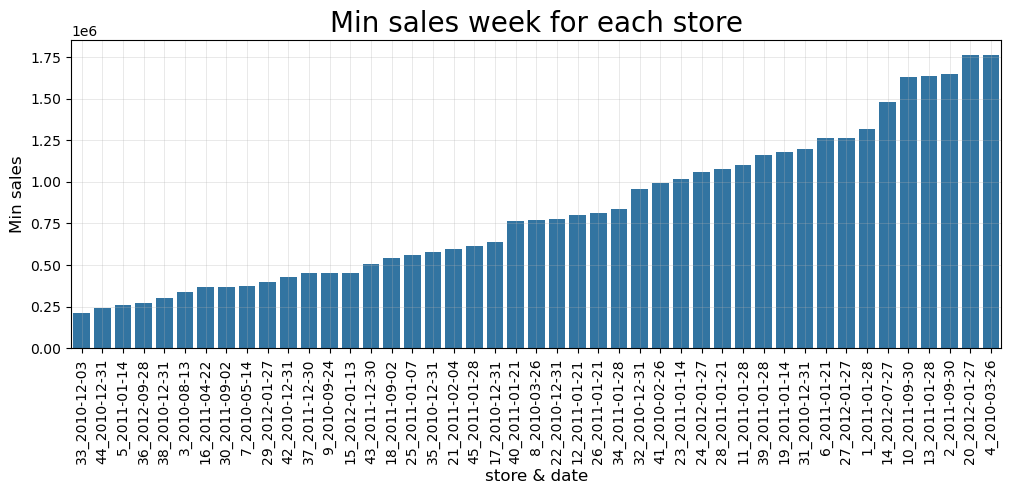

In [172]:
plt.figure(figsize=(12,4))
sns.barplot(x="store_date_min", y="weekly_sales_min", data=store_stats.sort_values("weekly_sales_min"))
plt.xlabel("store & date", fontsize=12)
plt.ylabel("Min sales", fontsize=12)
plt.title("Min sales week for each store", fontsize=20)
plt.grid(alpha=0.5, linewidth=0.4)
plt.xticks(rotation=90)
plt.show()

- **Store 33 and 44 have the lowest minimum sales and the lowest maximum sales week**
- **Most of the stores record minimum sales week in the month of January**

#### Total sales recorded by each store 

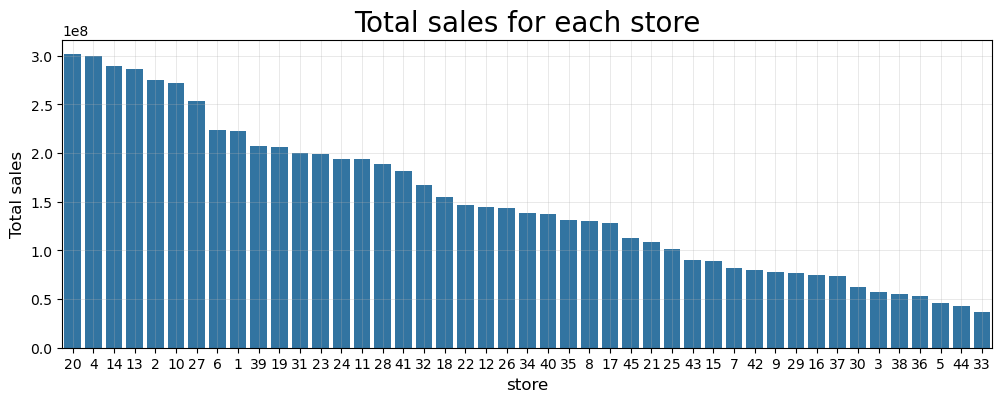

In [170]:
plt.figure(figsize=(12,4))
sns.barplot(x="store", y="weekly_sales_sum", data=store_stats, order=store_stats.sort_values("weekly_sales_sum", ascending=False)["store"])
plt.xlabel("store", fontsize=12)
plt.ylabel("Total sales", fontsize=12)
plt.title("Total sales for each store", fontsize=20)
plt.grid(alpha=0.5, linewidth=0.4)
plt.show()

- **Stores 33, 44 & 5 have recorded less than 50 million total sales and are the worst-performing stores**
- **Store-20 is the only store to exceed 300 million in total sales while store-4 just falls a tad short of 300 million**

#### Top 20 highest weekly sales recorded across stores

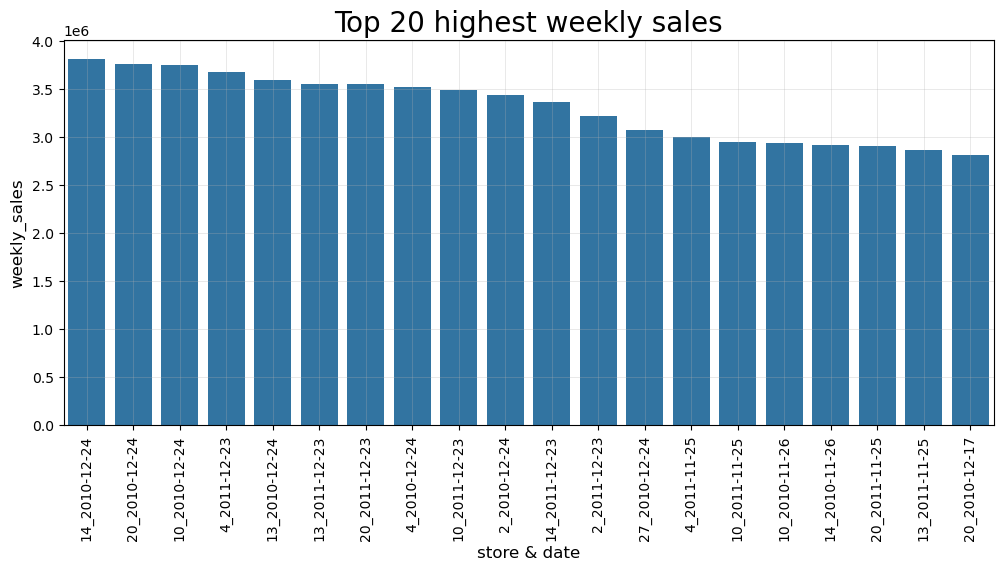

In [166]:
top_20_sales = df[["date", "store","weekly_sales"]].sort_values("weekly_sales", ascending=False).head(20).reset_index()
top_20_sales["store_date"] = top_20_sales["store"].astype(str)+"_"+top_20_sales["date"].astype(str)
plt.figure(figsize=(12,5))
sns.barplot(x="store_date", y="weekly_sales", data=top_20_sales)
plt.xlabel("store & date", fontsize=12)
plt.ylabel("weekly_sales", fontsize=12)
plt.title("Top 20 highest weekly sales", fontsize=20)
plt.xticks(rotation=90)
plt.grid(alpha=0.5, linewidth=0.4)
plt.show()

- **We can observe that the 20 highest sales recorded are in the month of December and November**
- **In fact, the 13 highest sales are from the month of December and the date is 23rd and 24th**
- **This does not come as a surprise as the sales are going to be at the highest during Christmas holidays**
- **Store 14 recorded the highest sales ever in the week of "2010-12-24**

In [155]:
top_20_sales["store"].value_counts()

store
20    4
10    4
14    3
4     3
13    3
2     2
27    1
Name: count, dtype: int64

- **stores 20 and store 10 are repeated 4 times in the top 20 weeks**
- **Stores 20 also has the highest total sales and store 10 is ranked 6th in the highest total sales**
- **stores 4 and 14 are repeated 3 times in the top 20 weeks**
- **These stores and also ranked 2nd and 3rd respectively in the highest total sales**

#### Lowest 20 sales week recorded across stores

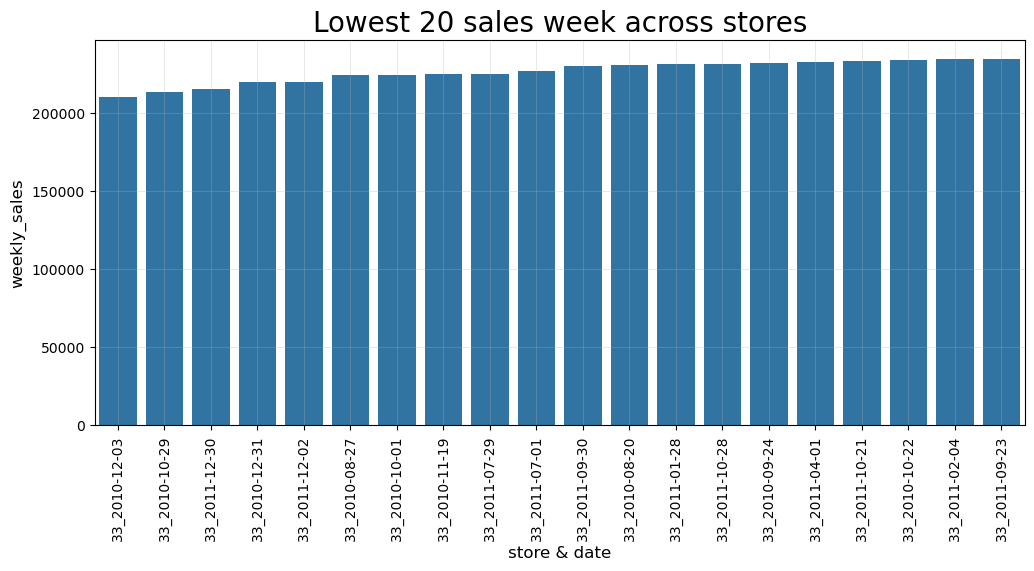

In [168]:
lowest_20_sales = df[["date", "store","weekly_sales"]].sort_values("weekly_sales").head(20).reset_index()
lowest_20_sales["store_date"] = lowest_20_sales["store"].astype(str)+"_"+lowest_20_sales["date"].astype(str)
plt.figure(figsize=(12,5))
sns.barplot(x="store_date", y="weekly_sales", data=lowest_20_sales)
plt.xlabel("store & date", fontsize=12)
plt.ylabel("weekly_sales", fontsize=12)
plt.title("Lowest 20 sales week across stores", fontsize=20)
plt.xticks(rotation=90)
plt.grid(alpha=0.5, linewidth=0.4)
plt.show()

- **Store 33 consistently records lowest sales**
- **All 20 lowest sales recorded are from store 33**
- **Store 33 also has the lowest total sum of sales**
- **This is the worst performing store**

## A - If the weekly sales are affected by the unemployment rate, if yes, which stores are suffering the most

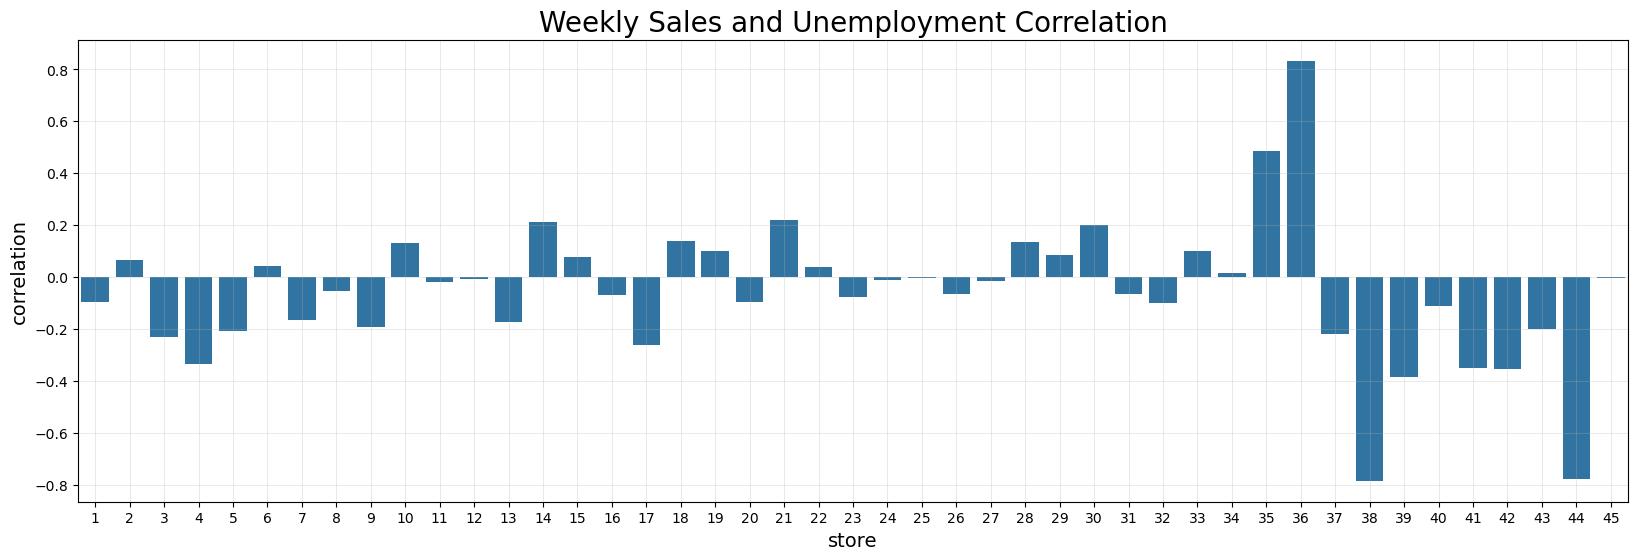

In [222]:
correlations = []
for store in df["store"].unique():
    store_data = df[df["store"] == store]
    store_corr = store_data["weekly_sales"].corr(store_data["unemployment"])
    correlations.append({"store": store, "correlation": store_corr})

corr_df = pd.DataFrame(correlations)
corr_df = corr_df.sort_values(by="correlation", ascending=True)

plt.figure(figsize=(20,6))
sns.barplot(x="store", y="correlation", data=corr_df)
plt.xlabel("store", fontsize=14)
plt.ylabel("correlation", fontsize=14)
plt.title("Weekly Sales and Unemployment Correlation", fontsize=20)
plt.grid(linewidth=0.4, alpha=0.5)
plt.show()

In [224]:
print(corr_df.head(5))
print(corr_df.tail(5))

    store  correlation
37     38    -0.785290
43     44    -0.780076
38     39    -0.384681
41     42    -0.356355
40     41    -0.350630
    store  correlation
29     30     0.201862
13     14     0.210786
20     21     0.218367
34     35     0.483865
35     36     0.833734


In [226]:
print("Stores affected most by unemployment rate \n")
print("\n Store 37 & 43 have the highest negative correlation")
print("\n That means as the unemployment rate increases, weekly sales decrease \n")
print("\n Store 35 has the highest positive correlation")
print("\n That means as the unemployment rate increases, weekly sales also increase")

Stores affected most by unemployment rate 


 Store 37 & 43 have the highest negative correlation

 That means as the unemployment rate increases, weekly sales decrease 


 Store 35 has the highest positive correlation

 That means as the unemployment rate increases, weekly sales also increase


## B - If the weekly sales show a seasonal trend, when and what could be the reason?

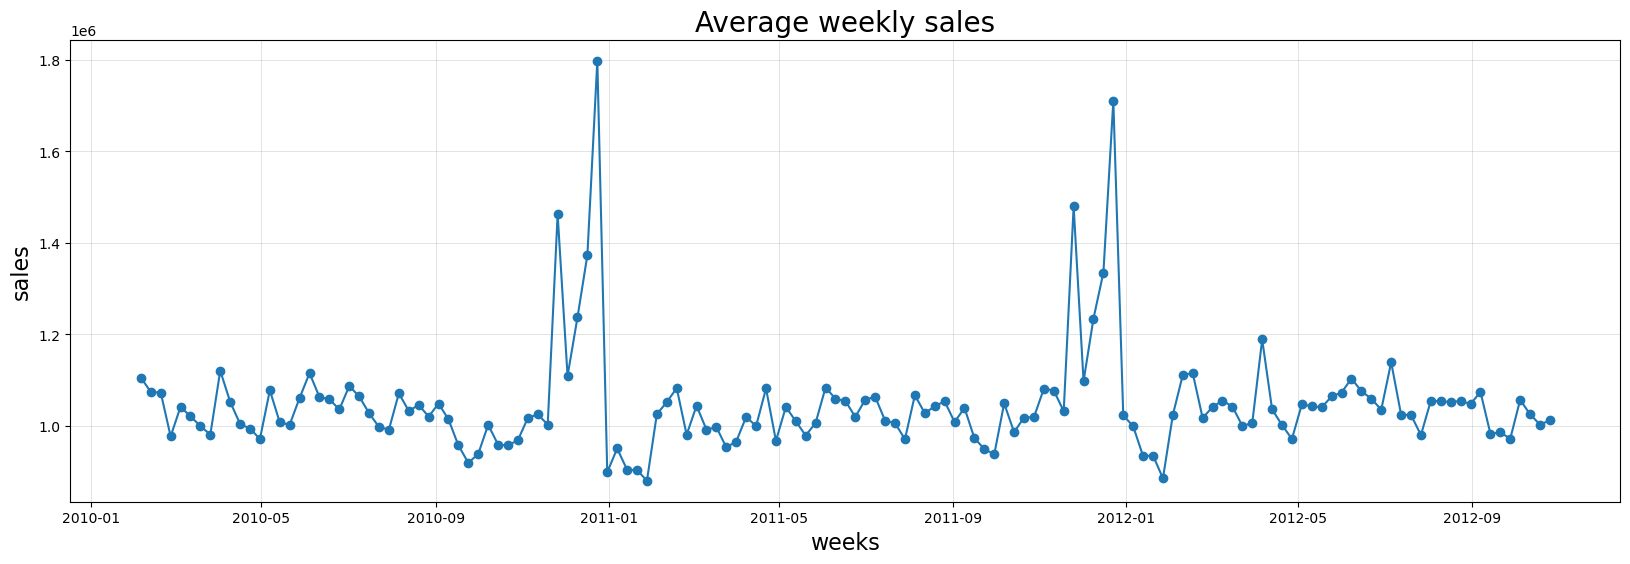

In [186]:
weekly_sales_grp = df.groupby([df['date']]).agg(avg_weekly_sales=("weekly_sales", "mean"))

plt.figure(figsize=(20,6))
plt.plot(weekly_sales_grp, marker="o")
plt.xlabel("weeks", fontsize=16)
plt.ylabel("sales", fontsize=16)
plt.title("Average weekly sales", fontsize=20)
plt.grid(linewidth=0.5, alpha=0.5)
plt.show()

**From the above plot, we can conclude that the weekly sales stay constant from January to October. Then there is a sharp increase in November then a sharp declie in the starting of December and then a sharp rise towards the end of December. Furthermore, the decline in sales seems to be highest from the end of December weeks to January**

#### Monthly aggregation

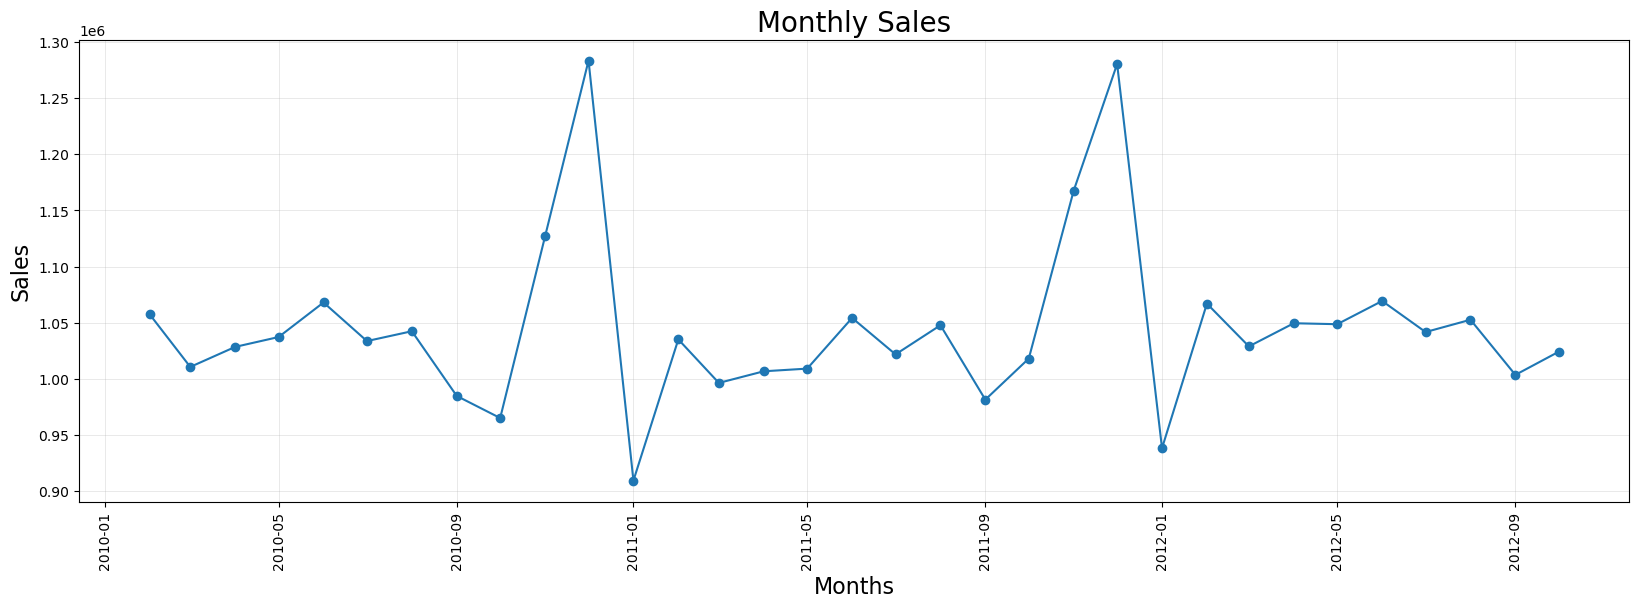

In [190]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

ym_sales = df.groupby(["year", "month"]).agg(monthly_sales = ("weekly_sales", "mean")).reset_index()
ym_sales["date"] = pd.to_datetime(ym_sales[["year", "month"]].assign(day=1))
ym_sales.drop(columns=["year", "month"], inplace=True)
ym_sales.index = ym_sales["date"]
ym_sales.drop(columns=["date"], inplace=True)

plt.figure(figsize=(20,6))
plt.plot(ym_sales, marker="o")
plt.xlabel("Months", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.title("Monthly Sales", fontsize=20)
plt.grid(linewidth=0.4, alpha=0.5)
plt.xticks(rotation=90)
plt.show()

**The monthly aggregation plot also gives us similar insight to weekly sales aggregation. The sales remain constant over the period of January to October. Then a sharp increase towards the end of December and then a steep decline in January**

#### Mean monthly sales across years

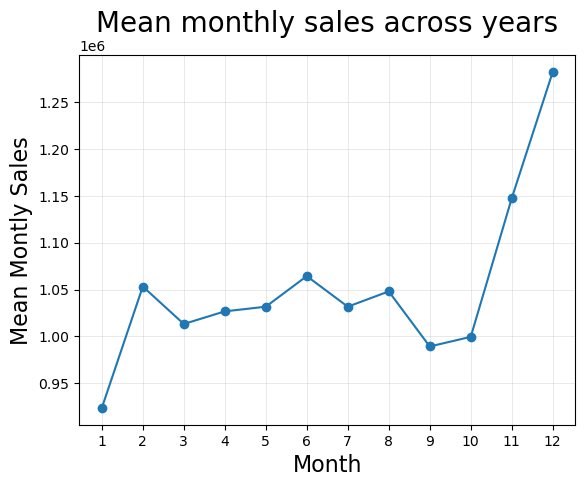

In [197]:
total_monthly_sales = df.groupby([df['date'].dt.month]).agg(monthly_sales=("weekly_sales", "mean"))

plt.plot(total_monthly_sales, marker="o")
plt.xlabel("Month", fontsize=16)
plt.ylabel("Mean Montly Sales", fontsize=16)
plt.title("Mean monthly sales across years", fontsize=20)
plt.grid(linewidth=0.4, alpha=0.5)
plt.xticks(range(1,13))
plt.show()

- **As expected the average sales are highest in the month of December and the lowest in January**
- **We also observe almost constant sales from February to August and then a decline in September. Just a slight increase in October and a steep rise from October to December**

**The last 2 months have many holidays like Black Friday, Halloween, Thanksgiving and Christmas holidays**

**Hence, holidays are the major factors contributing towards high sales and low sales immediately after the holiday season**

## C - Does temperature affect the weekly sales in any manner?

In [207]:
temp_corr = df["weekly_sales"].corr(df["temperature"])
temp_corr

-0.0638100131794696

- **The correlation between weekly sales and temperature seems almost non-existent**
- **However, let us analyze store wise correlation of temperature with weekly sales**

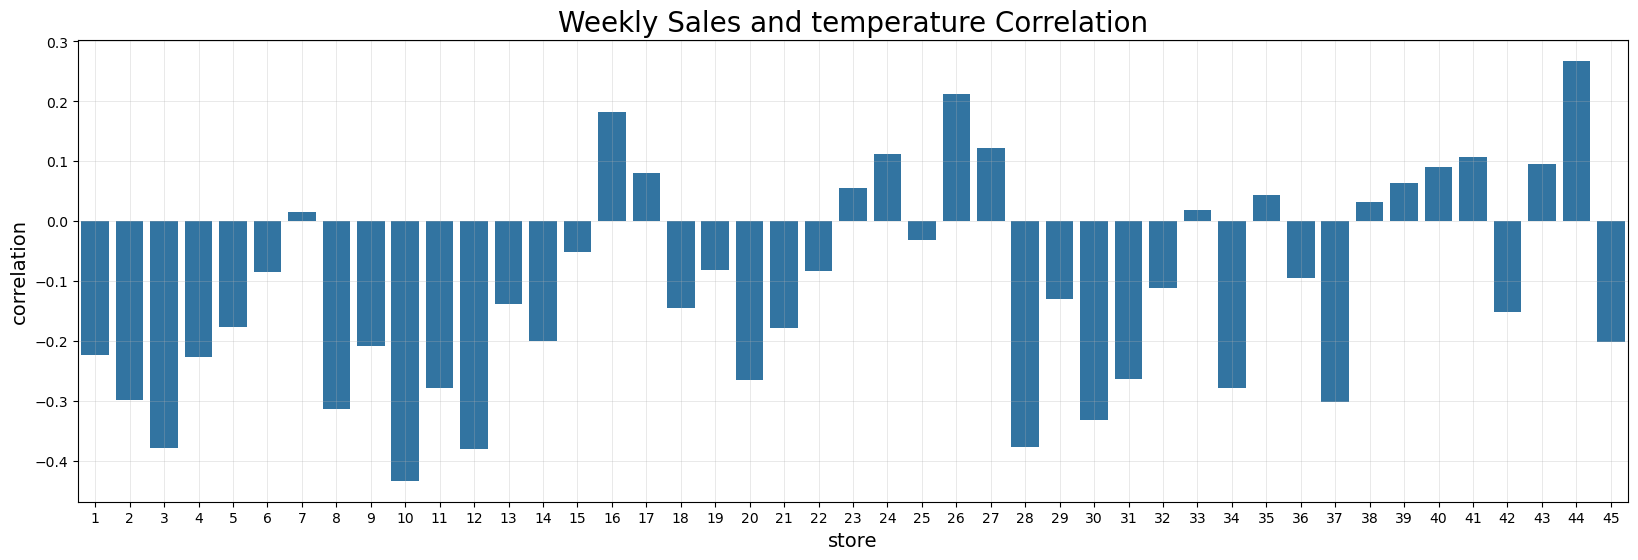

In [210]:
correlations = []
for store in df["store"].unique():
    store_data = df[df["store"] == store]
    store_corr = store_data["weekly_sales"].corr(store_data["temperature"])
    correlations.append({"store": store, "correlation": store_corr})

corr_df = pd.DataFrame(correlations)
corr_df = corr_df.sort_values(by="correlation", ascending=True)

plt.figure(figsize=(20,6))
sns.barplot(x="store", y="correlation", data=corr_df)
plt.xlabel("store", fontsize=14)
plt.ylabel("correlation", fontsize=14)
plt.title("Weekly Sales and temperature Correlation", fontsize=20)
plt.grid(linewidth=0.4, alpha=0.5)
plt.show()

- **As we can observe from the plot, weekly sales of none of the stores have high correlation with temperature**
- **The highest positive correlation is for store 44 which is less than 0.3 and hence very weak correlation. Similarly, store 10 has the highest negative correlation which is less than -0.5 and again very weak correlation** 

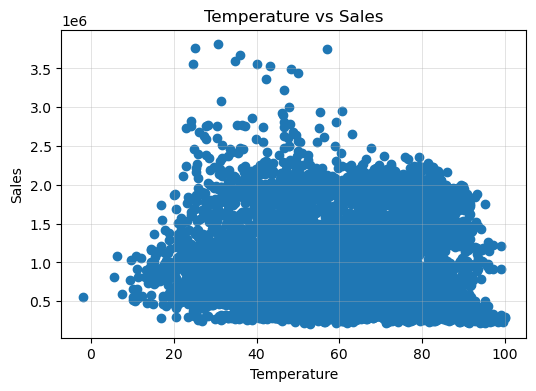

In [213]:
plt.figure(figsize=(6,4))
plt.scatter(x=df["temperature"], y=df["weekly_sales"])
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("Temperature vs Sales")
plt.grid(linewidth=0.5, alpha=0.5)
plt.show()

- **Most of the data points are in the temperature range of 20-80 and almost equally distributed in the range of 250K to 2.25 million**
- **Temperature range of 20-60 shows some data points that have recorded very high sales but they are very few to establish any correlation**
- **Similary, for temperature less than 20, most of the weekly sales are under 1.5 million. Hence, this might indicate some correlation with extreme low temperatures**

## D - How is the consumer price index affecting the sales of various stores?

    store  correlation
37     38     0.812837
43     44     0.740150
38     39     0.428043
40     41     0.392293
41     42     0.360859
    store  correlation
42     43    -0.285686
29     30    -0.298188
13     14    -0.419755
34     35    -0.424107
35     36    -0.915095


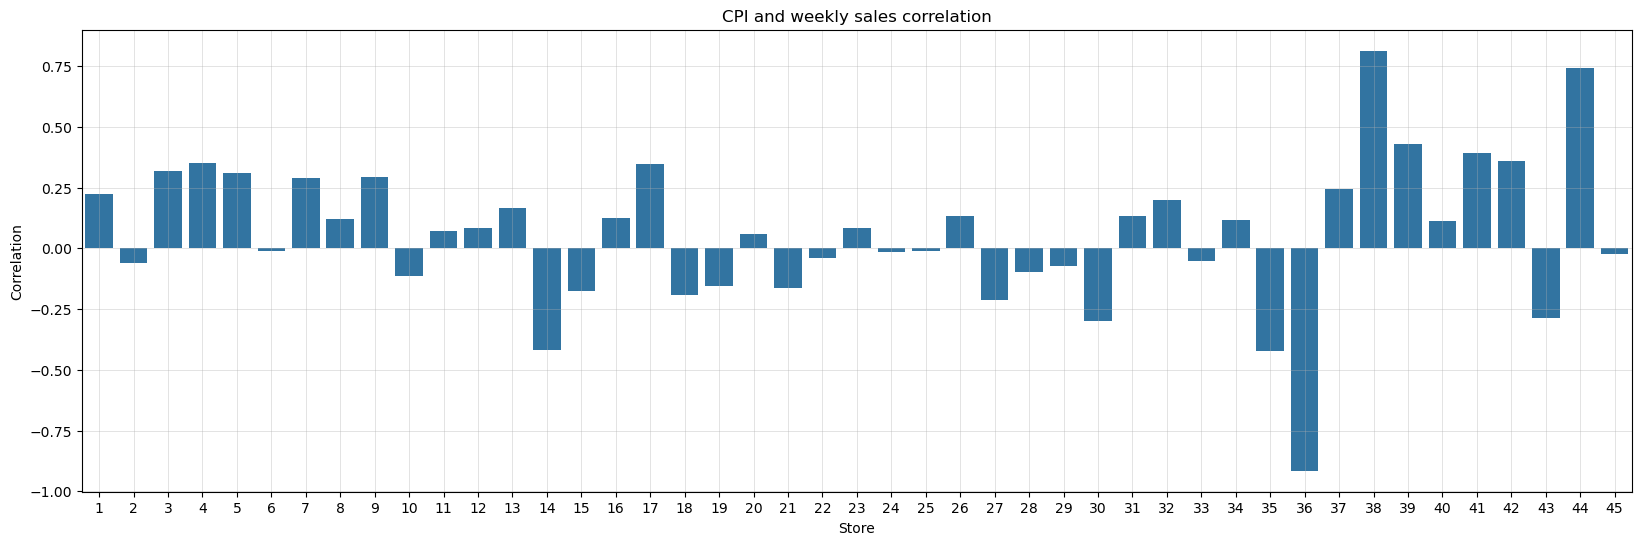

In [229]:
correlation = []
for store in df["store"].unique():
    df_store = df[df["store"]==store]
    cpi_corr = df_store["cpi"].corr(df_store["weekly_sales"])
    correlation.append({"store": store, "correlation": cpi_corr})

cpi_corr_df = pd.DataFrame(correlation).sort_values("correlation", ascending=False)

print(cpi_corr_df.head())
print(cpi_corr_df.tail())

plt.figure(figsize=(20,6))
sns.barplot(x="store", y="correlation", data=cpi_corr_df)
plt.xlabel("Store")
plt.ylabel("Correlation")
plt.title("CPI and weekly sales correlation")
plt.grid(linewidth=0.5, alpha=0.5)
plt.show()

**There is a strong positive correlation between CPI and weekly sales for store 38 and a moderate positive correlation for store 44. This means as the cpi increases, sales also increase**

**Whereas store 36 strongly correlates negatively with CPI and weekly sales. That means as the cpi increases, sales decrease**

**For the remaining stores, there is not so strong correlation between cpi and weekly sales**


## E - Top performing stores according to historical data 

- **We have already plotted top_20 stores by total sales earlier**
- **We will extract top 5 stores from the earlier plot**

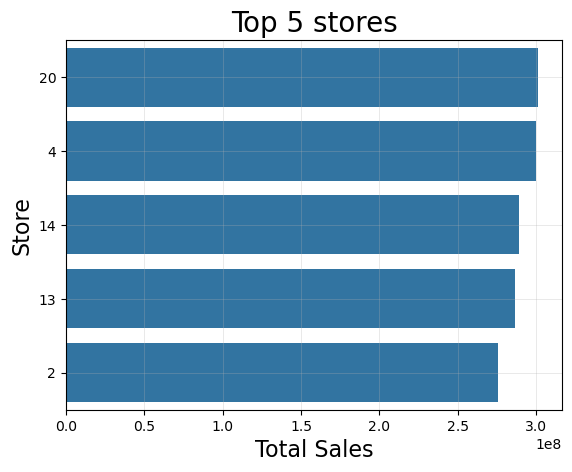

In [242]:
top_5 = store_stats.sort_values("weekly_sales_sum", ascending=False).head()

top_5["store"] = top_5["store"].astype("category")
sns.barplot(x=top_5["weekly_sales_sum"], y=top_5["store"], order=top_5["store"])
plt.xlabel("Total Sales", fontsize=16)
plt.ylabel("Store", fontsize=16)
plt.title("Top 5 stores", fontsize=20)
plt.grid(alpha=0.5, linewidth=0.4)
plt.show()

## F - The worst performing stores and how significant is the difference between the highest and the lowest performing stores?

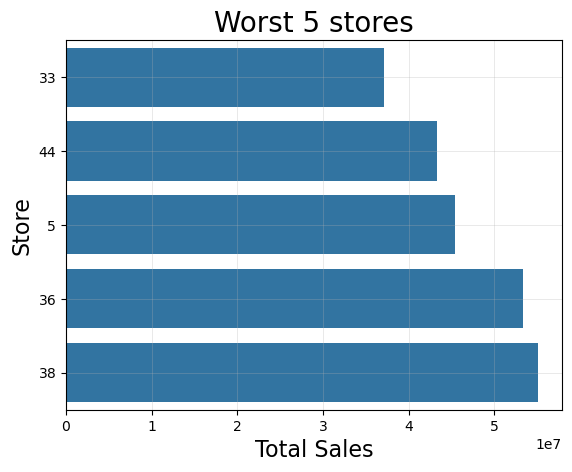

In [247]:
worst_5 = store_stats.sort_values("weekly_sales_sum", ascending=True).head()

worst_5["store"] = worst_5["store"].astype("category")
sns.barplot(x=worst_5["weekly_sales_sum"], y=worst_5["store"], order=worst_5["store"])
plt.xlabel("Total Sales", fontsize=16)
plt.ylabel("Store", fontsize=16)
plt.title("Worst 5 stores", fontsize=20)
plt.grid(alpha=0.5, linewidth=0.4)
plt.show()

In [249]:
# Difference in sales of the top 5 and the worst 5 stores
diff_sales = top_5["weekly_sales_sum"].sum() - worst_5["weekly_sales_sum"].sum()
print(f"Differnece in sales performance of the top 5 and the worst 5 stores is: {diff_sales}")

Differnece in sales performance of the top 5 and the worst 5 stores is: 1217340961.87


In [251]:
# Percentage difference
per_diff = (top_5["weekly_sales_sum"].sum()/worst_5["weekly_sales_sum"].sum())*100
print(f"Percentage differnece in sales performance of the top 5 and the worst 5 stores is: {per_diff}")

Percentage differnece in sales performance of the top 5 and the worst 5 stores is: 619.12008562647


**The top 5 stores are performing 6 times better than the worst 5 performing stores**

## Model Buliding Process

**For model building we will need the date and the weekly_sales column. So we will store these columns in a new data frame**

In [257]:
# We have 45 stores. We will take input from the user on the store number
a = int(input("Enter store number:"))
store = df[df["store"]==a]

Enter store number: 1


In [259]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         143 non-null    int64         
 1   date          143 non-null    datetime64[ns]
 2   weekly_sales  143 non-null    float64       
 3   holiday_flag  143 non-null    int64         
 4   temperature   143 non-null    float64       
 5   fuel_price    143 non-null    float64       
 6   cpi           143 non-null    float64       
 7   unemployment  143 non-null    float64       
 8   year          143 non-null    int32         
 9   month         143 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 11.2 KB


**For time series modeling, we need only the date and weekly_sales column and date column as index**

In [262]:
store = store.loc[:, ["date", "weekly_sales"]].set_index("date")
store.head()

,weekly_sales
date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


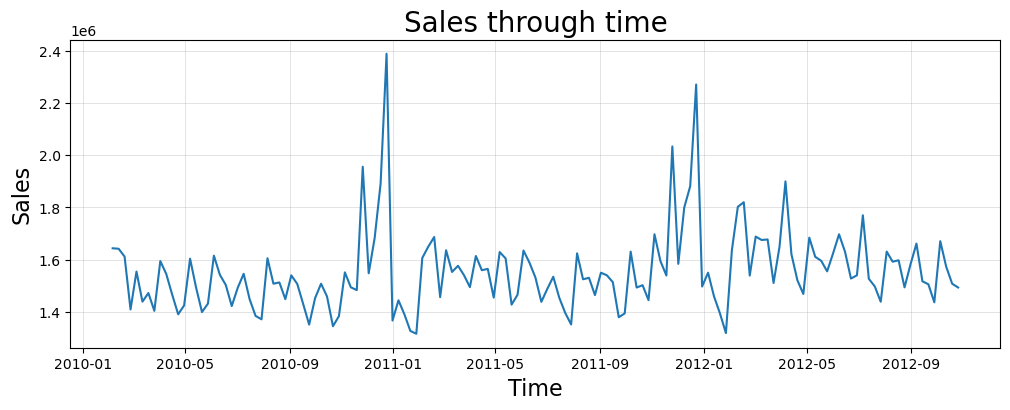

In [264]:
plt.figure(figsize=(12,4))
plt.plot(store["weekly_sales"])
plt.xlabel("Time", fontsize=16)
plt.ylabel("Sales", fontsize=16)
plt.title("Sales through time", fontsize=20)
plt.grid(linewidth=0.5, alpha=0.5)
plt.show()

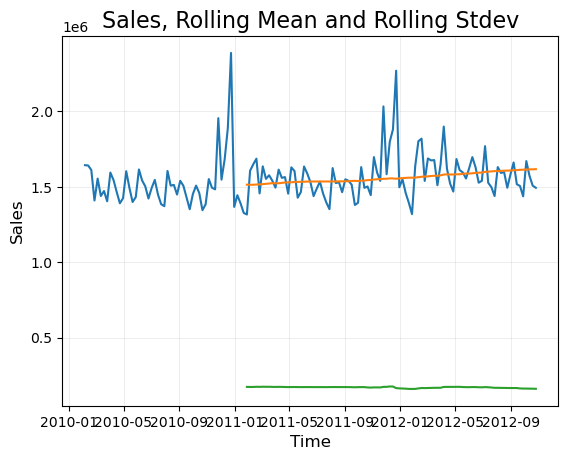

In [272]:
# Let us calculate the rolling mean and rolling standard deviation
rol_mean = store.rolling(window=52).mean().dropna()
rol_std = store.rolling(window=52).std().dropna()

plt.plot(store["weekly_sales"])
plt.plot(rol_mean)
plt.plot(rol_std)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Sales, Rolling Mean and Rolling Stdev", fontsize=16)
plt.grid(linewidth=0.4, alpha=0.4)
plt.show()

**For time series modeling we need mean as constant and standard deviation as 0. The mean is almost constant**
**We can also verify this with AdFuller Test**

In [275]:
from statsmodels.tsa.stattools import adfuller

In [277]:
def check_stationarity(timeseries):
    stationarity = adfuller(timeseries, autolag="AIC")
    print(f"ADF statistic: {stationarity[0]}")
    print(f"Pvalue: {stationarity[1]}")
    for key, value in stationarity[4].items():
        print("Critical values")
        print(f"{key}, {value}")
    print(f"lag value: {stationarity[2]}")
    print(f"nobs: {stationarity[3]}")

    if stationarity[1]<0.05:
        print("Series is stationary")
    else:
        print("series is not stationary")

In [279]:
check_stationarity(store)

ADF statistic: -5.102186145192288
Pvalue: 1.3877788330759434e-05
Critical values
1%, -3.47864788917503
Critical values
5%, -2.882721765644168
Critical values
10%, -2.578065326612056
lag value: 4
nobs: 138
Series is stationary


In [281]:
from statsmodels.tsa.seasonal import seasonal_decompose

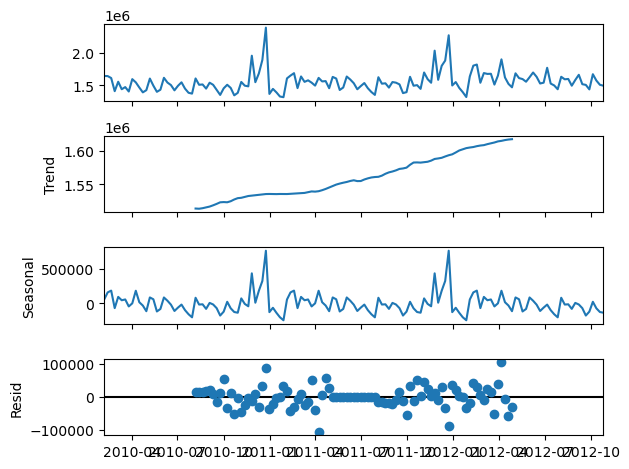

In [283]:
decomposition = seasonal_decompose(store, period=52)
decomposition.plot();

**The series shows a clear trend. However, the series is also stationary as confirmed by the adfuller test and we can also observe that most of the residuals are centered around 0 indicating that most of the trend and seasonality are captured and the series is stationary. We can perform one differencing and see if the trend can be removed**

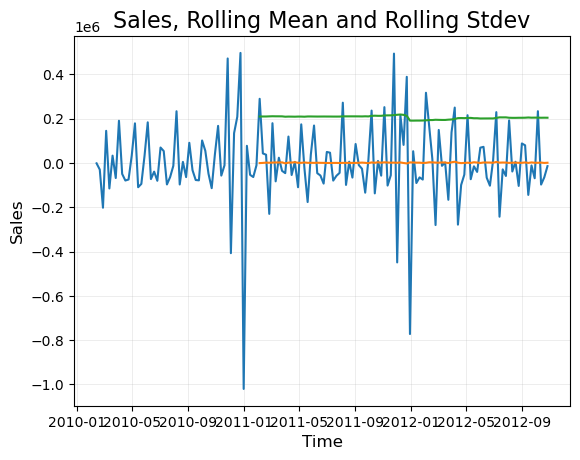

In [286]:
store_diff = store.diff().dropna()

rol_mean = store_diff.rolling(window=52).mean().dropna()
rol_std = store_diff.rolling(window=52).std().dropna()

plt.plot(store_diff["weekly_sales"])
plt.plot(rol_mean)
plt.plot(rol_std)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Sales, Rolling Mean and Rolling Stdev", fontsize=16)
plt.grid(linewidth=0.4, alpha=0.4)
plt.show()

**The standard deviatiton is 0 and the mean  is almost constant**

In [289]:
check_stationarity(store_diff)

ADF statistic: -7.261575374002518
Pvalue: 1.6761796699229722e-10
Critical values
1%, -3.480118600110386
Critical values
5%, -2.8833618426136196
Critical values
10%, -2.578407034974382
lag value: 7
nobs: 134
Series is stationary


**The differenced series is also stationary**

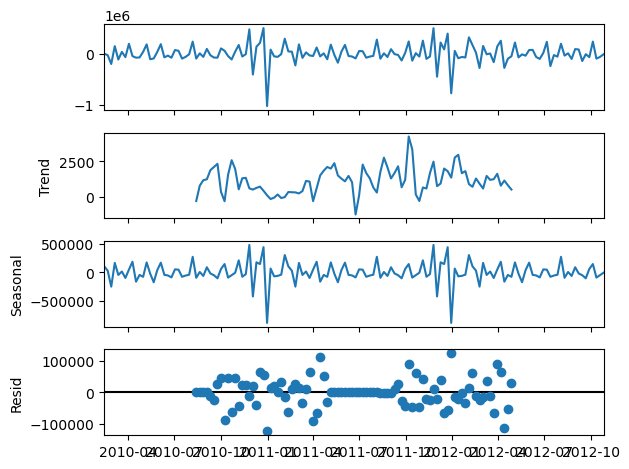

In [294]:
decomposition_diff = seasonal_decompose(store_diff, period=52)
decomposition_diff.plot();

**The trend has now been removed. So, we can conclude that our series requires one differencing to remove the trend. Removing trend is one of the pre-requisites of time series model predictions**

In [299]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

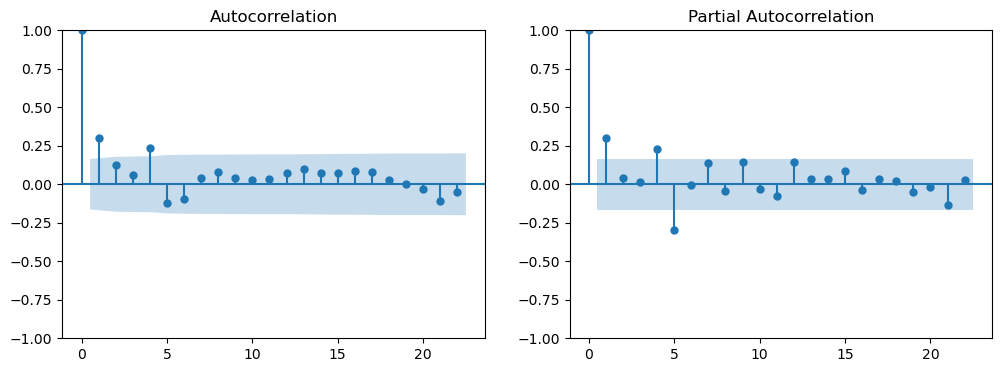

In [301]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

plot_acf(store, ax1)
plot_pacf(store, ax2)
plt.show()

- **For determing P(AR- Auto-regressive term), we use pacf plot. The pacf vlaue is significant at lag 1 and then dies down and it is again significant at lag 5**
- **For determining Q(MA- Moving average term), we use acf plot. The acf value is significant at lag 1 and at lag 4**
- **Determining P and Q values using acf and pacf plot can be very tricky**
- **Hence, we will not rely solely on these plots to determine these values as they are the most important parameters in our model prediction**

In [304]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [312]:
d=1 # We know that series requires one differencing
p=q=range(0,5)
pq = list(itertools.product(p,q))
model_list=[]
for x in pq:
    comb = list(x)
    comb.insert(1,d)
    comb=tuple(comb)
    model_list.append(comb)
print(model_list)    

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4)]


In [314]:
def arima_optimizer(data, pdq_range):
    best_aic = float('inf')
    best_order = None
    for order in pdq_range:
        try:
            model=ARIMA(data, order=order)
            result=model.fit()
            if result.aic<best_aic:
                best_aic, best_order = result.aic, order
        except:
            continue
    return best_order

In [316]:
best_model = arima_optimizer(store, model_list)
print("Best ARIMA model is", best_model)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI w

Best ARIMA model is (2, 1, 3)


- **Best ARIMA model is (2,1,3)**
- **We will also verify this with auto_arima**

In [319]:
from pmdarima import auto_arima

In [321]:
arima_model = auto_arima(store["weekly_sales"], seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.36 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=0.41 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

**Auto_arima also gives the best model as (2,1,3)**

### Train and test split

In [324]:
train = store[:120]
test = store[120:]

## Implementing ARIMA model

In [328]:
model = ARIMA(store, order=(2,1,3))
result = model.fit()
print(result.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1897.843
Date:                Fri, 20 Dec 2024   AIC                           3807.686
Time:                        18:30:09   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.0

In [330]:
store["predict"] = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

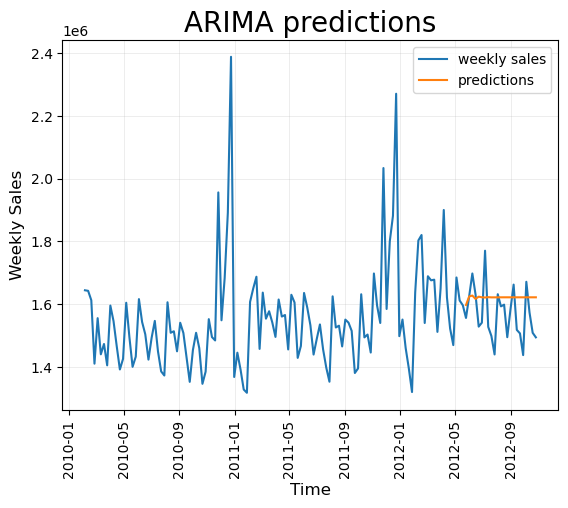

In [336]:
plt.plot(store["weekly_sales"], label="weekly sales")
plt.plot(store["predict"], label="predictions")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.title("ARIMA predictions", fontsize=20)
plt.grid(alpha=0.4, linewidth=0.4)
plt.xticks(rotation=90)
plt.legend()
plt.show()

**As we can observe from the plot, ARIMA gives terrible predictions. It is nowhere close to the real predictions. It has failed to capture any seasonality or trend**

**So, we will implement SARIMAX and see if we can get better predictions**

## Implementing SARIMAX model

In [342]:
model_sarimax = SARIMAX(store["weekly_sales"], order=(2,1,3), seasonal_order=(2,1,3,52))
result_sarimax = model_sarimax.fit()
print(result_sarimax.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       weekly_sales   No. Observations:                  143
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 52)   Log Likelihood               -1140.461
Date:                            Fri, 20 Dec 2024   AIC                           2302.922
Time:                                    18:39:15   BIC                           2330.420
Sample:                                02-05-2010   HQIC                          2314.011
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3348      1.090      0.307      0.759      -1.802       2.471
ar.L2          0.1530      0.788   

In [344]:
store["predict"] = result_sarimax.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

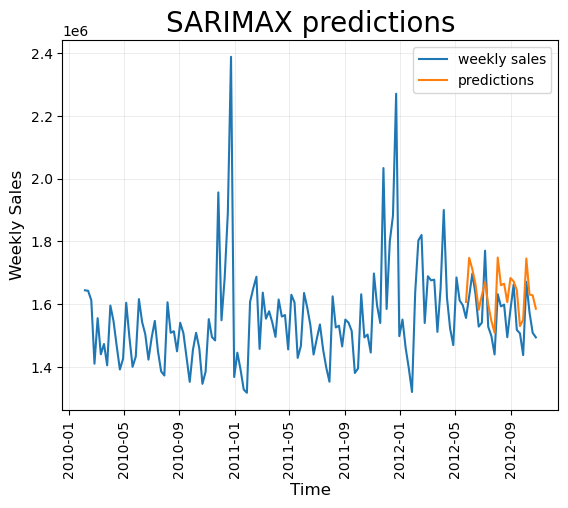

In [346]:
plt.plot(store["weekly_sales"], label="weekly sales")
plt.plot(store["predict"], label="predictions")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.title("SARIMAX predictions", fontsize=20)
plt.grid(alpha=0.4, linewidth=0.4)
plt.xticks(rotation=90)
plt.legend()
plt.show()

**As we can observe from the plot, predictitons by SARIMAX are very close to the actual values. Hence, it has captured the seasonality and trend very well**

### Mean Squared Error and Root Mean Squared Error

In [350]:
prediction = store.iloc[120:]
mse = (np.sum((prediction["predict"] - prediction["weekly_sales"])**2))/len(prediction)
print("Mean squared error is:", mse)
rmse=mse**0.5
print("Root Mean squared error is:", rmse)

Mean squared error is: 6855290855.330803
Root Mean squared error is: 82796.68384259603


## Forecast for the next 12 weeks

In [353]:
forecast = result_sarimax.forecast(steps=12)

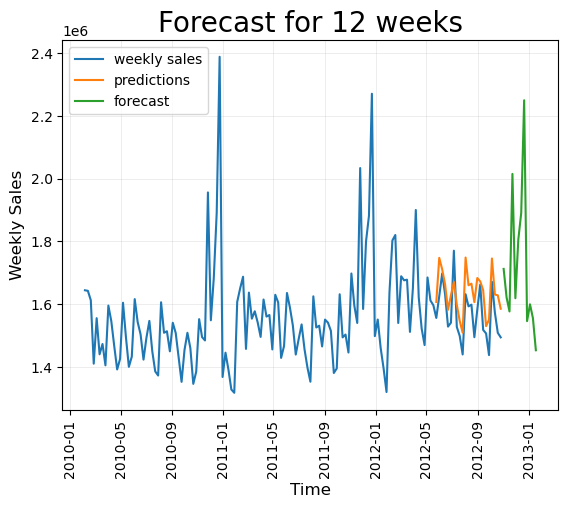

In [356]:
plt.plot(store["weekly_sales"], label="weekly sales")
plt.plot(store["predict"], label="predictions")
plt.plot(forecast, label="forecast")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.title("Forecast for 12 weeks", fontsize=20)
plt.grid(alpha=0.4, linewidth=0.4)
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Forecast for the the 12 weeks from November to January is almost similar to those of the previous years. Hence, our model has made accurate forecasting**

**Isolating the 12 weeks from each year from the above plot to reconcile the forecast with the same time period in previous years**

In [368]:
store = store.reset_index()
nov_dec_jan = store[(store["date"].dt.month==11) | (store["date"].dt.month==12) | (store["date"].dt.month==1)]
nov_dec_jan

,date,weekly_sales,predict
39,2010-11-05,1551659.28,NaN
40,2010-11-12,1494479.49,NaN
41,2010-11-19,1483784.18,NaN
42,2010-11-26,1955624.11,NaN
43,2010-12-03,1548033.78,NaN
44,2010-12-10,1682614.26,NaN
45,2010-12-17,1891034.93,NaN
46,2010-12-24,2387950.20,NaN
47,2010-12-31,1367320.01,NaN
48,2011-01-07,1444732.28,NaN


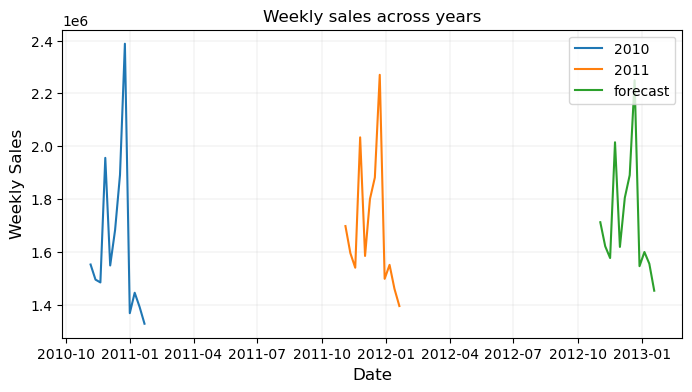

In [370]:
nov_dec_jan_2010_11 = nov_dec_jan.head(12).set_index("date")
nov_dec_jan_2011_12 = nov_dec_jan.iloc[13:25,:].set_index("date")
store = store.set_index("date")

plt.figure(figsize=(8,4))
plt.plot(nov_dec_jan_2010_11["weekly_sales"], label="2010")
plt.plot(nov_dec_jan_2011_12["weekly_sales"], label="2011")
plt.plot(forecast, label="forecast")
plt.legend()
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.title("Weekly sales across years")
plt.grid(alpha=0.5, linewidth=0.3)
plt.show()

**The model gives very accurate predictions with rmse of 82K**

**Similarly, we can predict the values for each store. The (p,d,q) values might differ based on the series of each store**